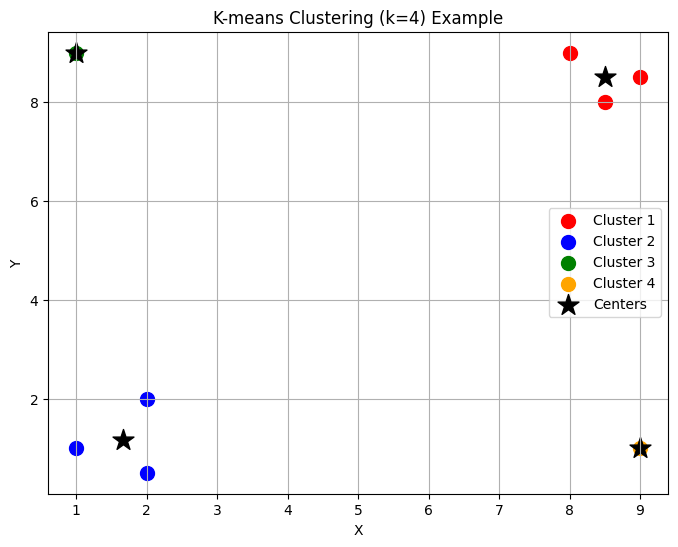

In [ ]:
"""K-means 군집화 예제(일반)"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. 데이터 생성
points = np.array([
    [1, 9],                 # 좌상단 1개
    [8, 9], [9, 8.5], [8.5, 8], # 우상단 3개
    [1, 1], [2, 2], [2, 0.5],   # 좌하단 3개
    [9, 1],                 # 우하단 1개
])

# 2. K-means 군집화(k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(points)
centers = kmeans.cluster_centers_

# 3. 군집화 결과 시각화
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'orange']

for i in range(k):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], s=100, color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centers[:,0], centers[:,1], s=250, marker='*', color='black', label='Centers')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering (k=4) Example')
plt.legend()
plt.grid(True)
plt.show()


초기 Centroid:
Centroid 1: [1 2]
Centroid 2: [2 2]

=== Iteration 1 ===
Centroid 1: [1.  1.5] (이전: [1 2])
Centroid 2: [3.75 3.25] (이전: [2 2])


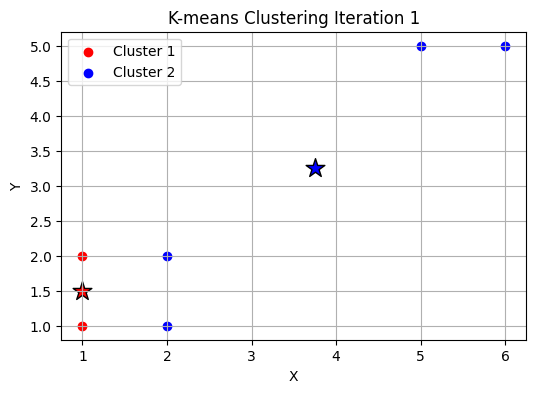


=== Iteration 2 ===
Centroid 1: [1.5 1.5] (이전: [1.  1.5])
Centroid 2: [5.5 5. ] (이전: [3.75 3.25])


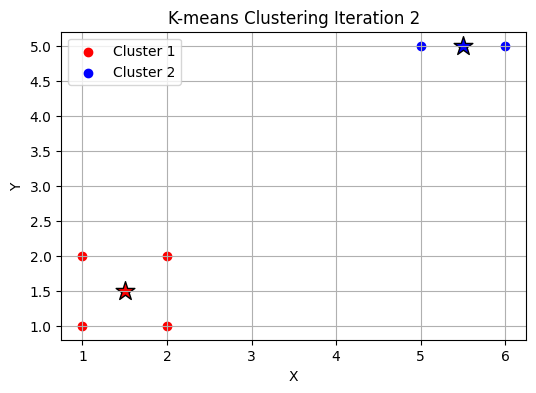


=== Iteration 3 ===
Centroid 1: [1.5 1.5] (이전: [1.5 1.5])
Centroid 2: [5.5 5. ] (이전: [5.5 5. ])


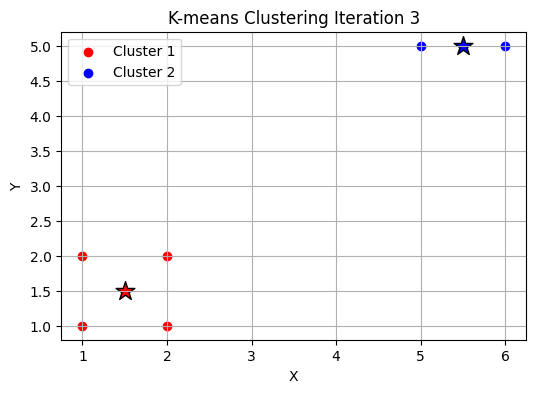


최종 Centroid:
Centroid 1: [1.5 1.5]
Centroid 2: [5.5 5. ]


In [ ]:
"""K-means 군집화 예제(각 단계별 진행)"""

import numpy as np
import matplotlib.pyplot as plt

# 데이터 포인트 정의
points = np.array([
    [1, 1],
    [1, 2],
    [2, 1],
    [2, 2],
    [5, 5],
    [6, 5]
])

# k 값 설정
k = 2
np.random.seed(0)  # 재현 가능성을 위해 랜덤 시드 고정

# 초기 centroid 선택

#랜덤
initial_centroid_indices = np.random.choice(len(points), k, replace=False)
centroids = points[initial_centroid_indices]
#지정
centroids = points[[1, 3]] # [1, 2]와 [2, 2]를 초기 중심으로 사용

def plot_clusters(points, labels, centroids, iteration):
    plt.figure(figsize=(6, 4))
    colors = ['r', 'b', 'g', 'y', 'c', 'm']  # 최대 6 클러스터 색상
    for i in range(k):
        cluster_points = points[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
        plt.scatter(centroids[i, 0], centroids[i, 1], marker='*', s=200, c=colors[i], edgecolors='k')
    plt.title(f'K-means Clustering Iteration {iteration}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

print("초기 Centroid:")
for i, c in enumerate(centroids):
    print(f"Centroid {i+1}: {c}")

iteration = 1
while True:
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    new_centroids = np.array([points[labels == j].mean(axis=0) for j in range(k)])

    print(f"\n=== Iteration {iteration} ===")
    for i, c in enumerate(new_centroids):
        print(f"Centroid {i+1}: {c} (이전: {centroids[i]})")

    plot_clusters(points, labels, new_centroids, iteration)

    if np.allclose(new_centroids, centroids):
        break

    centroids = new_centroids
    iteration += 1

print("\n최종 Centroid:")
for i, c in enumerate(centroids):
    print(f"Centroid {i+1}: {c}")


Step 1 - After visiting point [1. 1.], labels:
[1 1 1 0 0 0 0 0]


/tmp/ipykernel_468601/858256016.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


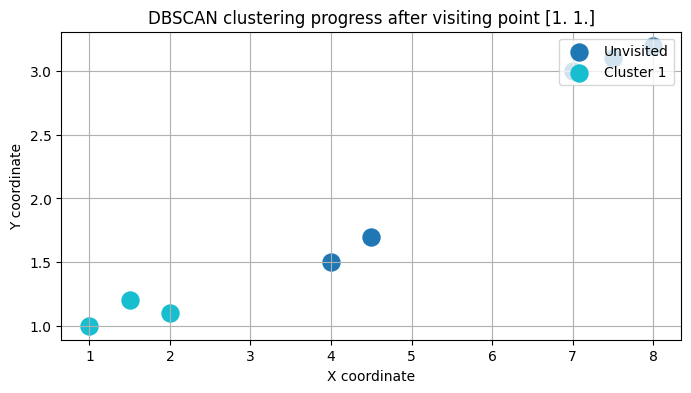

Step 4 - After visiting point [4.  1.5], labels:
[1 1 1 2 2 0 0 0]


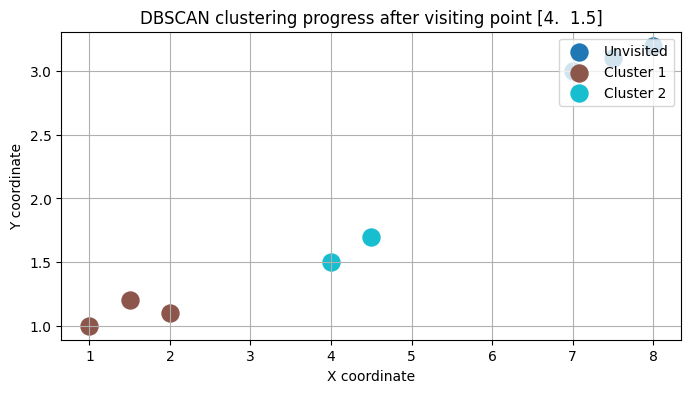

Step 6 - After visiting point [7. 3.], labels:
[1 1 1 2 2 3 3 3]


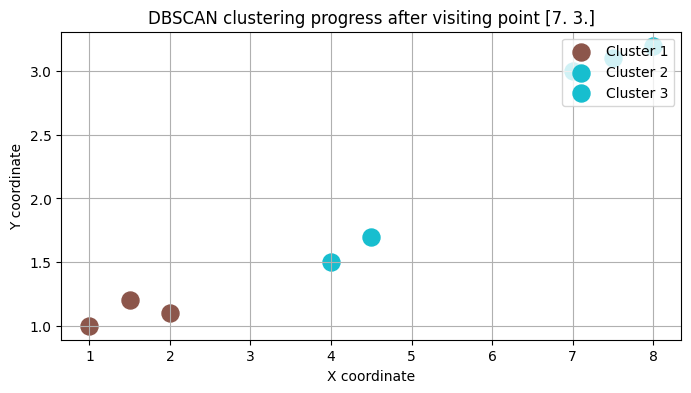

In [ ]:
"""DBSCAN 군집화 예제(각 단계별 진행)"""
import numpy as np
import matplotlib.pyplot as plt

# 2차원 데이터 포인트 (x, y)
points = np.array([
    [1, 1],
    [1.5, 1.2],
    [2, 1.1],
    [4, 1.5],
    [4.5, 1.7],
    [7, 3],
    [7.5, 3.1],
    [8, 3.2]
])

eps = 1.0  # EPS 반경
min_samples = 2  # 코어 포인트 판단 최소 이웃

def region_query(points, point_idx, eps):
    distances = np.linalg.norm(points - points[point_idx], axis=1)
    neighbors = np.where(distances <= eps)[0]
    return neighbors

def expand_cluster(points, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(points, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # 노이즈
        return False

    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        idx = neighbors[i]
        if labels[idx] == -1:
            labels[idx] = cluster_id
        elif labels[idx] == 0:
            labels[idx] = cluster_id
            new_neighbors = region_query(points, idx, eps)
            if len(new_neighbors) >= min_samples:
                neighbors = np.concatenate((neighbors, new_neighbors))
        i += 1
    return True

labels = np.zeros(len(points), dtype=int)
cluster_id = 0

for i in range(len(points)):
    if labels[i] != 0:
        continue
    if expand_cluster(points, labels, i, cluster_id + 1, eps, min_samples):
        cluster_id += 1

    print(f"Step {i+1} - After visiting point {points[i]}, labels:\n{labels}")

    plt.figure(figsize=(8, 4))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for lbl in unique_labels:
        cluster_points = points[labels == lbl]
        if lbl == -1:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        c='k', marker='x', s=150, label='Noise')
        else:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        c=[colors(lbl)], s=150, label=f'Cluster {lbl}' if lbl != 0 else 'Unvisited')

    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.title(f'DBSCAN clustering progress after visiting point {points[i]}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
